## Main goal this week is to examine the v-score for kmeans and start to work with gmm and dbscan

#### First we import all our packages:

In [13]:
#things we need in order to import our data
import datetime
import pandas as pd
#math-stuff
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math
#This is for enabling us to interact with plots
#import mpld3
#mpld3.enable_notebook()
%matplotlib notebook

#for plotting panda stuff
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#stat stuff
from scipy.stats import *

# ML
from sklearn.cluster import KMeans

#### Then we need to download the data (EURUSD), which is in hdf5 format and convert to python. Here we also specify between which timepoints we collect data from:

In [2]:
hdf = pd.HDFStore(r'C:\Users\Karl\Downloads\20170101_20190101_EURUSD.h5', complib = 'zlib')
symbol = 'EURUSD'
start = pd.to_datetime('2018-01-02')
end = pd.to_datetime('2018-01-03')

ticks = hdf.select(symbol, where='index>="{}" & index<="{}"'.format(start, end))
ticks.info()
hdf.close()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848522 entries, 2018-01-02 00:00:00.033000+00:00 to 2018-01-02 23:59:58.963000+00:00
Data columns (total 2 columns):
bid    848522 non-null float32
ask    848522 non-null float32
dtypes: float32(2)
memory usage: 12.9 MB


#### Now we want to check the data to see what the data looks like:

In [3]:
print(type(ticks))
ticks

<class 'pandas.core.frame.DataFrame'>


,bid,ask
date,,
2018-01-02 00:00:00.033000+00:00,1.20106,1.20110
2018-01-02 00:00:00.035000+00:00,1.20106,1.20109
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20109
...,...,...
2018-01-02 23:59:56.690000+00:00,1.20614,1.20618
2018-01-02 23:59:57.393000+00:00,1.20614,1.20618
2018-01-02 23:59:58.704000+00:00,1.20615,1.20618


### we want to extract more information this time, so we want columns of year, month, day, hour, minute, second, and average of bid and ask


In [4]:
dataset = [ticks['bid'].values[0:len(ticks)], ticks['ask'].values[0:len(ticks)]]
timeset = [ticks.index[0:len(ticks)].year, ticks.index[0:len(ticks)].month, ticks.index[0:len(ticks)].day, 
           ticks.index[0:len(ticks)].hour, ticks.index[0:len(ticks)].second]

bid_ask_avg = (ticks['bid'].values[0:len(ticks)]+ticks['ask'].values[0:len(ticks)])/2

total_set = [ticks.index[0:len(ticks)].year, ticks.index[0:len(ticks)].month, 
             ticks.index[0:len(ticks)].day, ticks.index[0:len(ticks)].hour, ticks.index[0:len(ticks)].second, bid_ask_avg]


## ------------ TESTSECTION!! ---------------

In [5]:
tidpunkt_trade = 1/(-(ticks.index.values[0:len(ticks.index)].astype('datetime64[ms]').astype(int))/(10**9))

In [6]:
prisdata = bid_ask_avg

In [7]:
data_test =[]
data_test_nbr2 = []

for i in range(0,len(ticks.index)):
    data_test.append([tidpunkt_trade[i],prisdata[i]])  #here i create a numerical representation of day,hour,second,millisecond etc)
    data_test_nbr2.append([prisdata[i],tidpunkt_trade[i]])

<IPython.core.display.Javascript object>


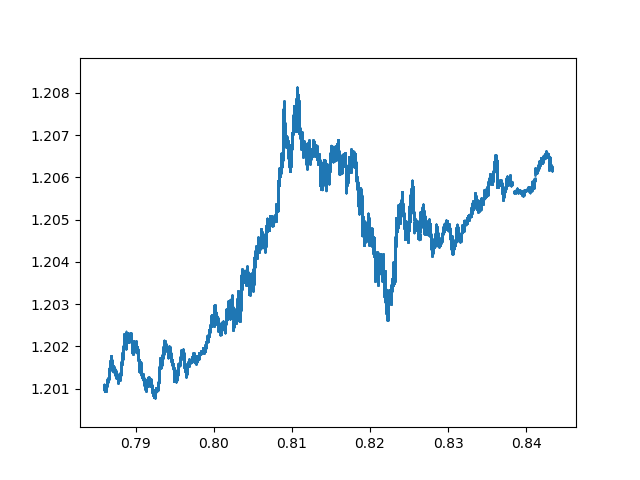

In [14]:
plt.figure()
plt.scatter(tidpunkt_trade,prisdata, s=0.05)

# (ignorera just nu) OBS här ser det ut som att priset sjönk under dagen, det gjorde det inte, det beror på att nummerrepresentationen av datum är lite skev (högre år ger mindre siffra..)

In [9]:
%%time

#Here I extract all the prevailing price levels in the data

prisnivåer = sorted(list(set(prisdata)))
aktivitet_per_prisnivå = np.zeros(len(prisnivåer))

count = 0
for i in prisnivåer:
    for ii in range(0,len(prisdata)):
        if prisdata[ii] == i:
            aktivitet_per_prisnivå[count] += 1
    count += 1

Wall time: 4min 22s


<IPython.core.display.Javascript object>


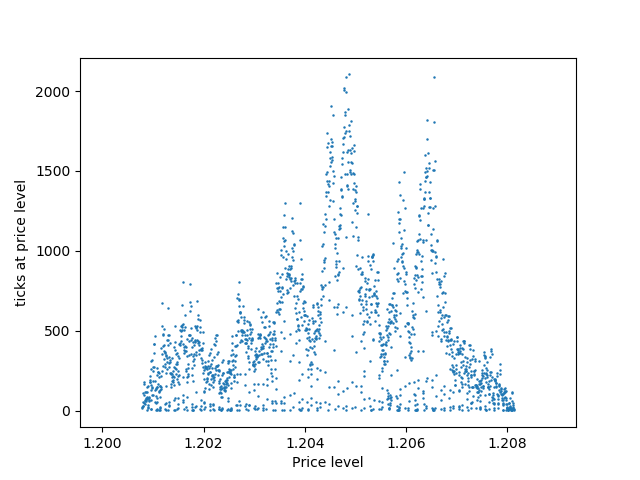

Text(0, 0.5, 'ticks at price level')

In [15]:
plt.figure()
plt.scatter(prisnivåer,aktivitet_per_prisnivå, s=0.6)
plt.xlabel('Price level')
plt.ylabel('ticks at price level')

In [11]:
data_test_nbr3 = []
data_test_nbr4 = []

for i in range(0,len(prisnivåer)):
    data_test_nbr3.append([prisnivåer[i],aktivitet_per_prisnivå[i]])
    data_test_nbr4.append([aktivitet_per_prisnivå[i],prisnivåer[i]])

In [12]:
data_test_nbr3

[[1.2007849, 14.0],
 [1.2007899, 22.0],
 [1.2007949, 26.0],
 [1.2008, 26.0],
 [1.200805, 113.0],
 [1.20081, 53.0],
 [1.200815, 166.0],
 [1.20082, 49.0],
 [1.200825, 179.0],
 [1.20083, 95.0],
 [1.200835, 114.0],
 [1.20084, 43.0],
 [1.200845, 64.0],
 [1.20085, 60.0],
 [1.200855, 76.0],
 [1.20086, 57.0],
 [1.200865, 118.0],
 [1.20087, 73.0],
 [1.200875, 117.0],
 [1.20088, 85.0],
 [1.200885, 147.0],
 [1.20089, 4.0],
 [1.2008901, 70.0],
 [1.2008951, 156.0],
 [1.2009, 19.0],
 [1.2009001, 21.0],
 [1.200905, 76.0],
 [1.20091, 32.0],
 [1.200915, 62.0],
 [1.20092, 63.0],
 [1.200925, 86.0],
 [1.20093, 76.0],
 [1.200935, 178.0],
 [1.20094, 181.0],
 [1.200945, 216.0],
 [1.20095, 189.0],
 [1.2009549, 7.0],
 [1.200955, 310.0],
 [1.2009599, 66.0],
 [1.20096, 158.0],
 [1.2009649, 263.0],
 [1.200965, 12.0],
 [1.2009699, 128.0],
 [1.200975, 143.0],
 [1.20098, 147.0],
 [1.200985, 319.0],
 [1.20099, 97.0],
 [1.200995, 272.0],
 [1.201, 100.0],
 [1.201005, 246.0],
 [1.20101, 185.0],
 [1.201015, 363.0],
 [1.2

### Kmeans

In [16]:
initial_centroids = []
for i in range(4):
    initial_centroids.append([0,prisnivåer[450*i]])
initial_centroids = np.array(initial_centroids)

In [17]:
%%time
#we let our clustering model operate on our dataset  #init='k-means++', n_init=4
Kmean = KMeans(n_clusters=4, init=initial_centroids, n_init=1, max_iter=300, tol=0.0001, 
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(data_test_nbr4)
print(Kmean.labels_)
print(set(Kmean.labels_))
print(Kmean.cluster_centers_)
lb_kmean = Kmean.labels_
kmean_centers = Kmean.cluster_centers_

[0 0 0 ... 0 0 0]
{0, 1, 2, 3}
[[1.21789617e+02 1.20445761e+00]
 [4.49859272e+02 1.20403342e+00]
 [1.48647297e+03 1.20522466e+00]
 [8.60639871e+02 1.20493174e+00]]
Wall time: 8 ms


<IPython.core.display.Javascript object>


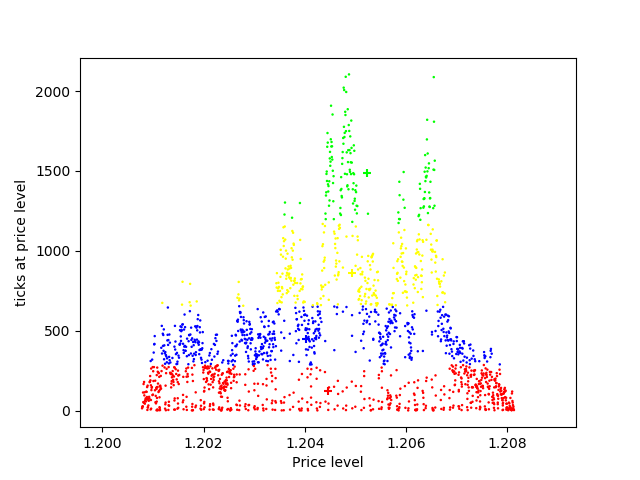

In [18]:
colormap_test_kmean = np.array(['red', 'blue', 'lime', 'yellow'])
plt.figure()
plt.scatter(prisnivåer,aktivitet_per_prisnivå, s=0.6, c=colormap_test_kmean[lb_kmean])
plt.xlabel('Price level')
plt.ylabel('ticks at price level')
count = 0
for i in kmean_centers:
    plt.scatter(i[1],i[0],marker='+',c=colormap_test_kmean[count])
    count+=1

## Kmean partitioning using own kmeans-model---------

In [19]:
def extr(lst,i): 
    return [item[i] for item in lst] 

def partition(vec,nbr_clusters):
    l = len(vec)
    price = extr(vec,0)
    activity = extr(vec,1)
    labels = np.zeros(l)
    centroids = []
    start = []
    for i in range(nbr_clusters):
        pos = rand.uniform(min(price),max(price))
        centroids.append([pos,i])
        start.append([pos,i])
        
    #cont = True
    #total_iterations = 0
    #while cont:
    
        #total_iterations += 1
    for iterations in range(300):
        
        #assigning datapoints to clusters:
        count=0
        for i in price:
            dist_start = 10**8 

            for c in centroids:
                distC = abs(i-c[0])
                if distC < dist_start:
                    labels[count] = c[1]
                    dist_start = distC    
            count+=1

        #updating cluster positions:
        for c in centroids:
            lab = c[1]
            xold = c[0]
            data_belonging_to_cluster = []

            for index in range(len(vec)):
                if labels[index] == lab:
                    data_belonging_to_cluster.append(vec[index])

            #calculating center of 'mass' i.e center of activity (OBS måste ta hänsyn till vart 'roden' börjar)
            price_in_data = extr(data_belonging_to_cluster,0)
            act_in_data = extr(data_belonging_to_cluster,1)
            summation = 0
            sum_act = 0
            
            if not price_in_data: 
                x0 = 0.00001
            else:
                x0 = min(price_in_data)

            for i in data_belonging_to_cluster:
                summation+= (i[0]-x0)*i[1]
                sum_act += i[1]
            
            if sum_act == 0:
                CM = 0
            else:
                CM = summation/sum_act
            c[0] = x0+CM
            eps = abs(c[0]-xold)
            
        #if eps < 0.00001:
            #cont = False
                

    return labels,centroids,start,iterations

In [20]:
%%time
lb_partition,cents,cent_start,iterations = partition(data_test_nbr3,5)

Wall time: 7.21 s


<IPython.core.display.Javascript object>


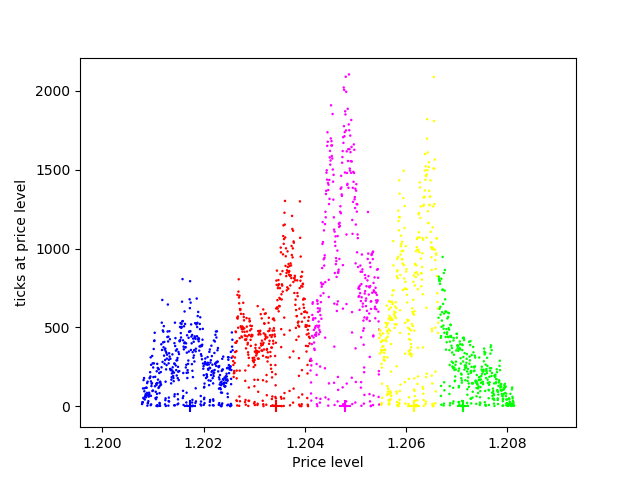

In [21]:
colormap_test_partition = np.array(['red', 'blue', 'lime', 'yellow','magenta', 'green'])
plt.figure()
plt.scatter(prisnivåer,aktivitet_per_prisnivå, s=0.6, c=colormap_test_partition[lb_partition.astype(int)])
plt.xlabel('Price level')
plt.ylabel('ticks at price level')
count = 0
for i in cents:
    plt.scatter(i[0],i[1],marker='+',c=colormap_test_partition[count],s=70)
    count+=1

## End of own model-----------------------

### GMM

In [22]:
from sklearn import preprocessing

#preprocessing to have zero mean and unit variance (std = 1)

scaler = preprocessing.StandardScaler()
scaler.fit(data_test_nbr3)
scaled_data = scaler.transform(data_test_nbr3)

print(np.mean(scaled_data), np.std(scaled_data))

-1.247705127084031e-14 1.0000000000000002


In [23]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
lb_gmm = gmm.fit_predict(scaled_data)
set(lb_gmm)

{0, 1, 2, 3, 4}

<IPython.core.display.Javascript object>


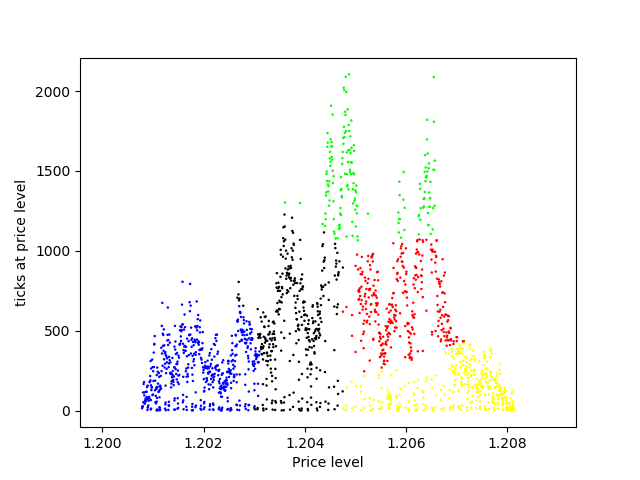

In [24]:
colormap_test_GMM = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.figure()
plt.scatter(prisnivåer,aktivitet_per_prisnivå, s=0.6, c=colormap_test_GMM[lb_gmm])
plt.xlabel('Price level')
plt.ylabel('ticks at price level')
count = 0
#for i in kmean_centers:
    #plt.scatter(i[1],i[0],marker='+',c=colormap_test_GMM[count])
    #count+=1

## Corrected GMM -----------------------------------------------

<IPython.core.display.Javascript object>


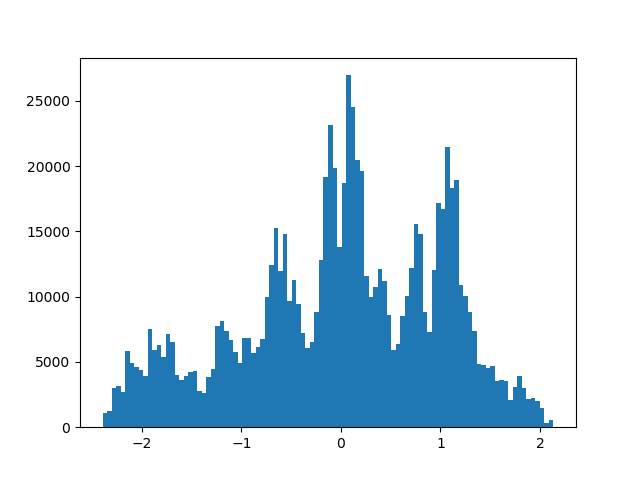

Mean: 0.00010436650475106695
Std: 0.9999999127501618
Wall time: 520 ms


In [25]:
%%time

scaled_price = np.zeros(len(prisdata))
mu = np.mean(prisdata)
std = np.std(prisdata)

count = 0
for i in prisdata:
    new_e = (i-mu)/std
    scaled_price[count] = new_e
    count+=1

plt.figure()
plt.hist(scaled_price,bins=100)

print('Mean: ' + str(np.mean(scaled_price)) + '\n' + 'Std: ' + str(np.std(scaled_price)))


In [51]:
np.histogram(scaled_price, bins=len(prisdata))

(array([14,  0,  0, ...,  0,  0,  3], dtype=int64),
 array([-2.39302993, -2.39302459, -2.39301926, ...,  2.13433105,
         2.13433638,  2.13434172]))

In [39]:
gmm = GaussianMixture(n_components=5)
lb_gmm = gmm.fit_predict(scaled_price)
set(lb_gmm)

ValueError: Expected 2D array, got 1D array instead:
array=[-2.21122122 -2.21430516 -2.21122122 ...  0.92093831  0.92093831
  0.92093831].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## -----------------------------------------------

### DBscan

In [27]:
from sklearn.cluster import DBSCAN

In [36]:
%%time
clustering = DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=None, p=None).fit(data_test_nbr3)
lb_DB = clustering.labels_
print(set(lb_DB))

{0, 1, 2, 3, -1}
Wall time: 7.98 ms


## ------------------------------------------

## ------------------------------------------

## Plotting the grouping made using the different clustering algorithms

In [65]:
%%time
# vi har en för kort colormap, (för vi har bara assignat enskilda prisnivåer till kluster, nu måste vi gå igenom hela prisdatan och assigna varje punkt ett kluster)

gruppering = np.zeros(len(prisdata))

count = 0
for i in prisdata:
    for j in range(0,len(prisnivåer)):
        if i == prisnivåer[j]: 
            #gruppering[count] = lb_kmean[j] #aktivera om vi vill köra kmean
            gruppering[count] = lb_partition[j]  #aktivera om vi vill köra partition
            #gruppering[count] = lb_gmm[j]   #aktivera om vi vill köra gmm
            #gruppering[count] = lb_DB[j]     #aktivera om vi vill köra DBscan
    count += 1

Wall time: 2min 3s


<IPython.core.display.Javascript object>


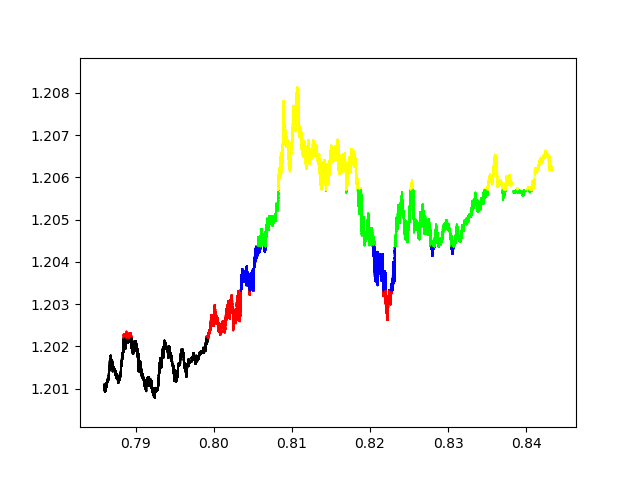

In [66]:
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.figure()
plt.scatter(tidpunkt_trade,prisdata,c=colormap[gruppering.astype(int)], s=0.05)

## ---------------------------------------------------------------------------------------

In [134]:
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.figure()
plt.scatter(tidpunkt_trade,prisdata,c=colormap[lb_kmean], s=0.05)

<IPython.core.display.Javascript object>

ValueError: 'c' argument has 1795 elements, which is not acceptable for use with 'x' with size 848522, 'y' with size 848522.

In [111]:
%%time

#we let our clustering model operate on our dataset
Kmean = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(data_test_nbr2)
print(Kmean.labels_)
lb_kmean = Kmean.labels_

[3 3 3 ... 5 5 5]
Wall time: 22.1 s


<IPython.core.display.Javascript object>


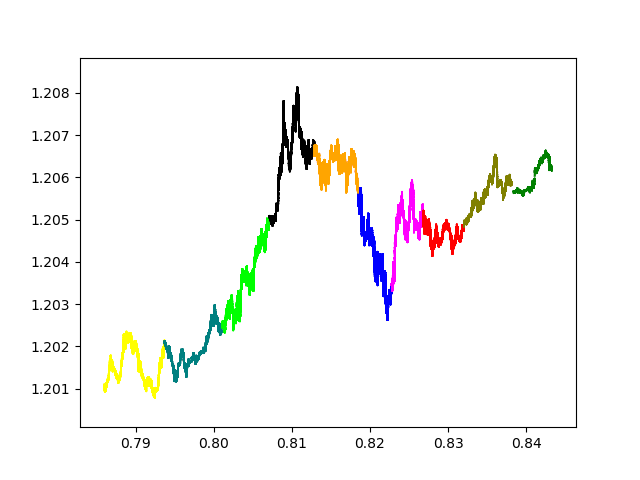

In [112]:
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.figure()
plt.scatter(tidpunkt_trade,prisdata,c=colormap[lb_kmean], s=0.05)

## -------------- End of testsection -----------------


In [14]:
data2 =[]

for i in range(0,len(ticks.index)):
    data2.append([ticks.index[i].,bid_ask_avg[i]])  #here i create a numerical representation of day,hour,second,millisecond etc)
    
#note i only need information from 'day' and downwards from timestamp (i never look at longer timespans than a day)

In [15]:
data2

[[Timestamp('2018-01-02 00:00:00.033000+0000', tz='UTC'), 1.2010801],
 [Timestamp('2018-01-02 00:00:00.035000+0000', tz='UTC'), 1.2010751],
 [Timestamp('2018-01-02 00:00:00.038000+0000', tz='UTC'), 1.2010801],
 [Timestamp('2018-01-02 00:00:00.038000+0000', tz='UTC'), 1.2010801],
 [Timestamp('2018-01-02 00:00:00.038000+0000', tz='UTC'), 1.2010751],
 [Timestamp('2018-01-02 00:00:00.038000+0000', tz='UTC'), 1.2010801],
 [Timestamp('2018-01-02 00:00:00.039000+0000', tz='UTC'), 1.2010801],
 [Timestamp('2018-01-02 00:00:00.040000+0000', tz='UTC'), 1.2010851],
 [Timestamp('2018-01-02 00:00:00.040000+0000', tz='UTC'), 1.2010901],
 [Timestamp('2018-01-02 00:00:00.043000+0000', tz='UTC'), 1.201095],
 [Timestamp('2018-01-02 00:00:00.047000+0000', tz='UTC'), 1.201095],
 [Timestamp('2018-01-02 00:00:00.056000+0000', tz='UTC'), 1.201095],
 [Timestamp('2018-01-02 00:00:00.058000+0000', tz='UTC'), 1.2011],
 [Timestamp('2018-01-02 00:00:00.064000+0000', tz='UTC'), 1.2011],
 [Timestamp('2018-01-02 00:00

## Method 1: k-means clustering

In [14]:
from sklearn.cluster import KMeans

In [9]:
#we change format so that it is in a format that the algorithms are based on
data =[]

for i in range(0,len(total_set[0])):
    data.append([total_set[0][i],total_set[1][i],total_set[2][i],total_set[3][i],total_set[4][i],total_set[5][i]])

In [16]:
data = data2

In [19]:
%%time

#we let our clustering model operate on our dataset
Kmean = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(data)
print(Kmean.labels_)
lb_kmean = Kmean.labels_

#centers = Kmean.cluster_centers_


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [105]:
#which group is most prominent?
def ecount(vector,number):
    sum = 0
    for i in vector:
        if i == number:
            sum +=1
    return sum

nbr_ele = []
for i in set(lb_kmean):
    nbr_ele.append([ecount(lb_kmean,i)])
nbr_ele
#answer: 5

[[108239],
 [120614],
 [56749],
 [59020],
 [132020],
 [12949],
 [118145],
 [48505],
 [48502],
 [143779]]

<IPython.core.display.Javascript object>


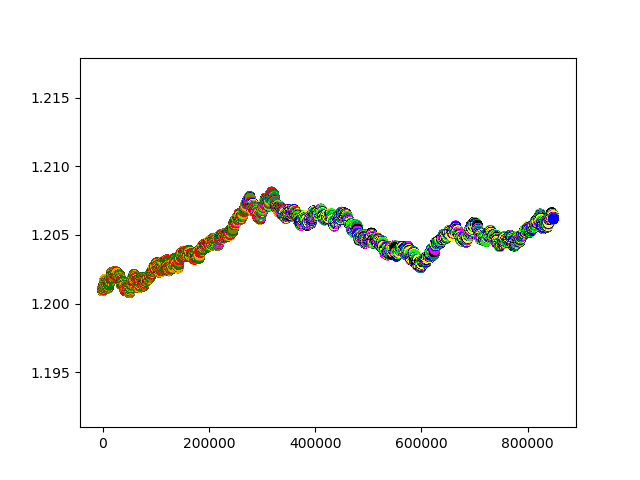

In [56]:
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.scatter(range(0,len(data)),bid_ask_avg,c=colormap[lb_kmean], s=40)

## Method 2: DBscan

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
%%time
clustering = DBSCAN(algorithm='auto', eps=0.0001, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=None, p=None).fit(data)
lb_DB = clustering.labels_
print(lb_DB)

[ 0  0  0 ... -1 -1 -1]
Wall time: 44.4 s


In [59]:
print(set(lb_DB))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## Method 3: GMM (using expectation maximization technique)

In [60]:
from sklearn import preprocessing

#preprocessing to have zero mean and std 1

scaler = preprocessing.StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

print(np.mean(scaled_data), np.std(scaled_data))

3.9637291751496e-15 0.7071067811878213


In [61]:
%%time
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10)
lb_gmm = gmm.fit_predict(scaled_data)
set(lb_gmm)


Wall time: 59 s


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Plotting all the methods together:

<IPython.core.display.Javascript object>


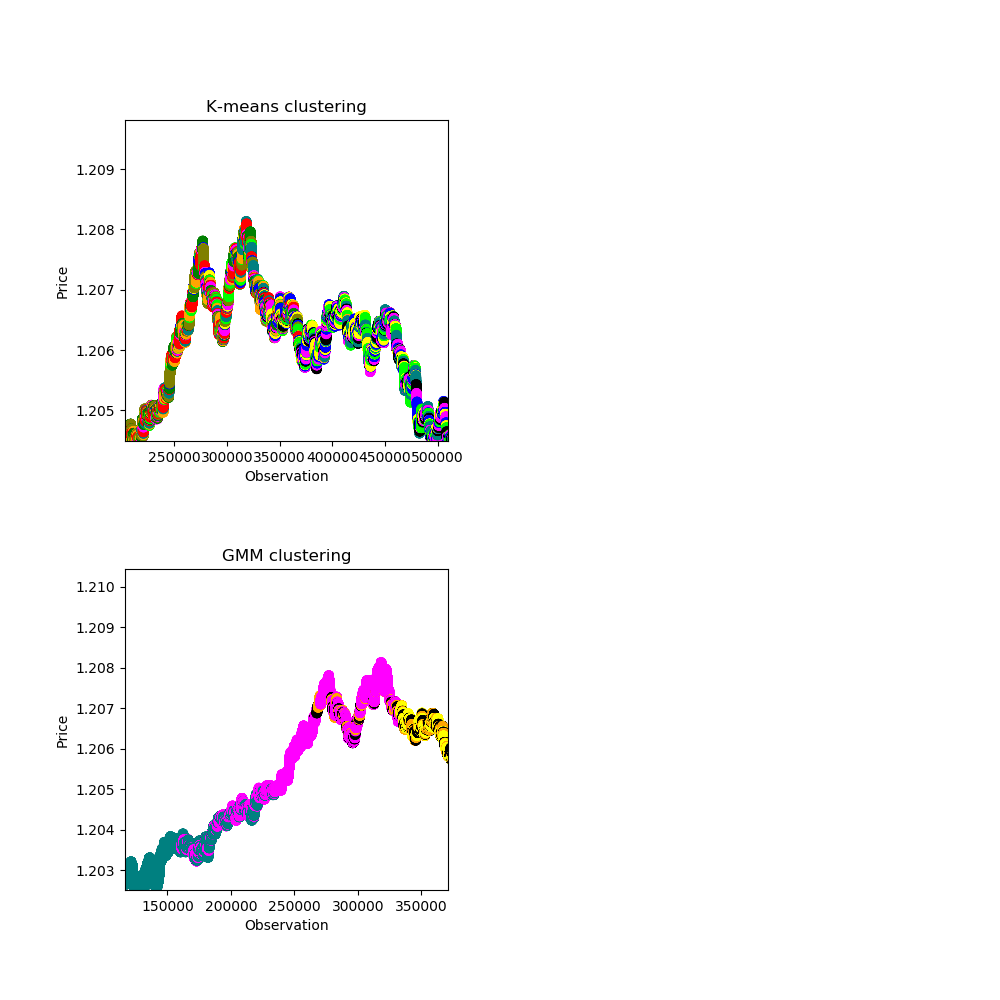

Wall time: 6.33 s


In [62]:
%%time
plt.figure(figsize=(10,10))
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
axisx = range(0,len(data))

plt.subplot(2,2,1)
plt.scatter(axisx,bid_ask_avg,c=colormap[lb_kmean], s=40)
plt.title('K-means clustering')
plt.xlabel('Observation')
plt.ylabel('Price')


#plt.subplot(2,2,2)
#plt.scatter(dataset[0],dataset[1],c=colormap[lb_DB], s=40)
#plt.title('DBscan clustering')
#plt.xlabel('Bid')
#plt.ylabel('Ask')

plt.subplot(2,2,3)
plt.scatter(axisx,bid_ask_avg,c=colormap[lb_gmm], s=40)
plt.title('GMM clustering')
plt.xlabel('Observation')
plt.ylabel('Price')

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

## We see a very linear behaviour between ask and bid, however there appears to be patterns in when during the day the trade is made, should we perhaps make a new enrichment in the form of activity? How will this work since we are looking at activity on a minute basis

## Producing cross-correlation and variance plots

<IPython.core.display.Javascript object>


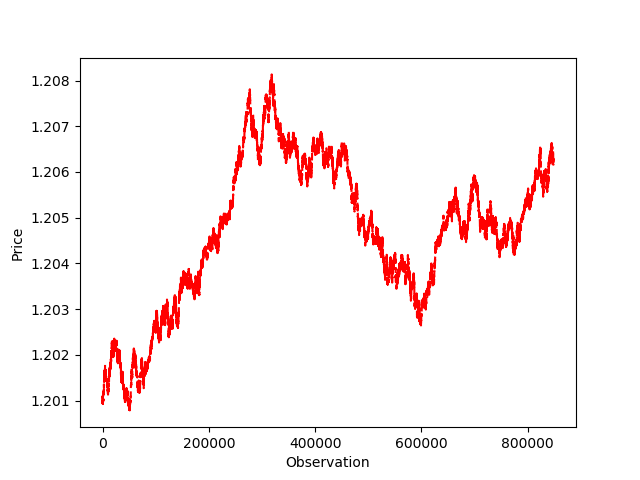

Text(0, 0.5, 'Price')

In [63]:
#First we taka a look at the time series
l = len(dataset[0])

plt.figure()
plt.plot(range(0,l),bid_ask_avg,c='r',ls='--')
plt.xlabel('Observation')
plt.ylabel('Price')

<IPython.core.display.Javascript object>


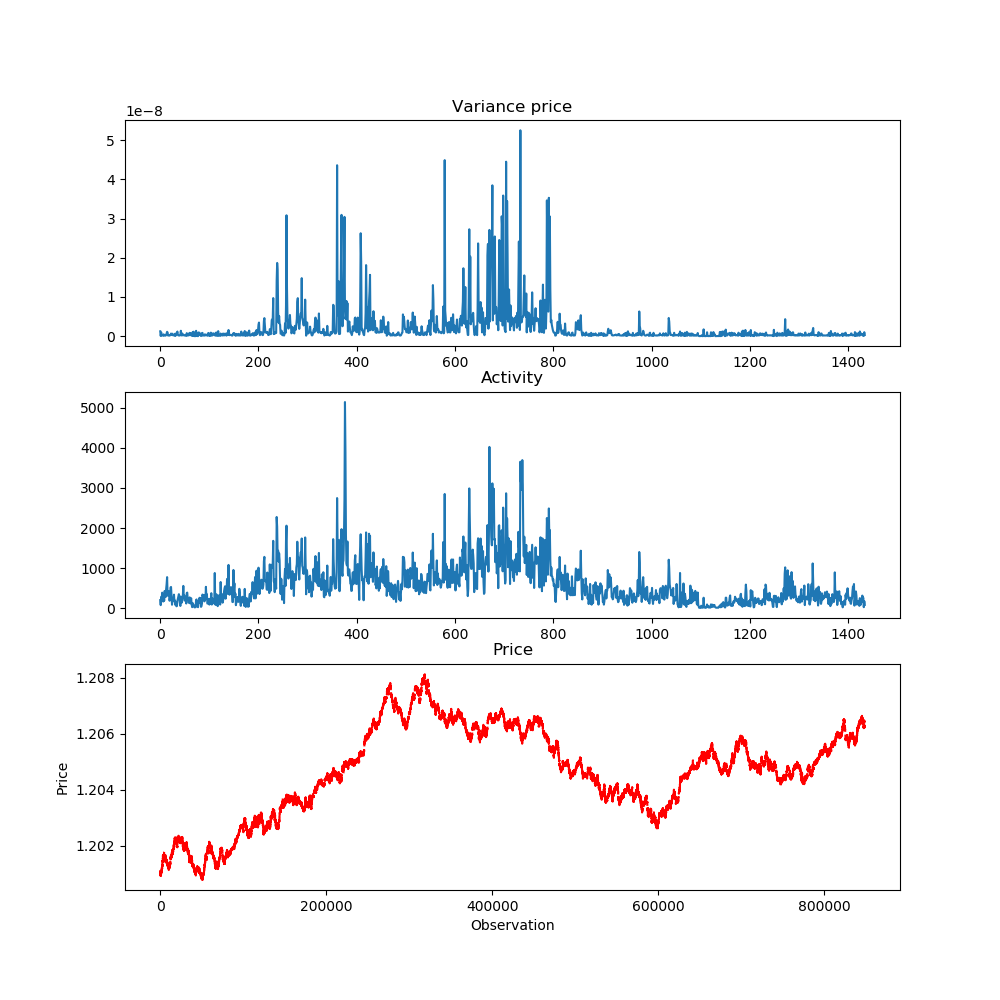

Wall time: 4.07 s


Text(0, 0.5, 'Price')

In [76]:
%%time

#this cell produces activity per minute and variance for price per minute

timestamps = ticks.index[0:len(ticks)].values
rounded_timestamps = timestamps.astype('datetime64[m]')

#variance per minute
length = len(set(rounded_timestamps.astype('datetime64[m]')))
minute_trades = set(rounded_timestamps.astype('datetime64[m]'))

var_price = np.zeros(length)
activity = np.zeros(length)

index = 0
start = 0
for i in minute_trades:
    stretch = np.count_nonzero(rounded_timestamps==i)
    activity[index] = stretch
    var_price[index] = np.var(bid_ask_avg[start:start+stretch])
    start = stretch+1
    index += 1

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(range(0,length),var_price)
plt.title('Variance price')

plt.subplot(3,1,2)
plt.plot(range(0,length),activity)
plt.title('Activity')

plt.subplot(3,1,3)
plt.plot(range(0,l),bid_ask_avg,c='r',ls='--')
plt.title('Price')
plt.xlabel('Observation')
plt.ylabel('Price')

### Now cross correlation and correlation plots (on a minute basis)

In [67]:
%%time

# covariance matrices
covariance_price_act = np.cov(var_price,activity)
# Pearson’s Correlation
corr_pear_price_act,_ = stats.pearsonr(var_price, activity)
# Spearman’s Correlation
corr_spear_price_act,_ = stats.spearmanr(var_price, activity)

print('#'*10 + ' Covariances ' + '#'*10 + '\n' +
     'price-activity ' + '\n'+ str(covariance_price_act) + '\n')
print('#'*10 + ' Pearson correlations ' + '#'*10 + '\n' +
     'price-activity:  ' + str(corr_pear_price_act) + '\n')
print('#'*10 + ' Spearman correlations ' + '#'*10 + '\n' +
     'price-activity:  ' + str(corr_spear_price_act) + '\n')

########## Covariances ##########
price-activity 
[[2.49642994e-17 2.04327874e-06]
 [2.04327874e-06 2.96314219e+05]]

########## Pearson correlations ##########
price-activity:  0.7512624434911381

########## Spearman correlations ##########
price-activity:  0.8278925538719138

Wall time: 1.97 ms


## Conclusion of the correlation plots is that there is definitely a correlation between high activity and high variance

# Here we want to examine what happens if activity and price level/minute are inputs to the cluster algorithms

In [74]:
price_set = set(bid_ask_avg)

for i in price_set:
    

In [100]:
%%time
#another activity-vector where we can see what activity that prevails each observation
activity_areas = np.zeros(len(bid_ask_avg))

index_start = 0
for i in activity:
    for j in range(index_start,index_start+int(i)):
        activity_areas[j] = i
    index_start = j+1
    
#just a concatenated matrix/list    
price_and_activity = []
for i in range(0,len(bid_ask_avg)):
    price_and_activity.append([bid_ask_avg[i],activity_areas[i]])

#    


Wall time: 816 ms


In [103]:
price_set = set(bid_ask_avg)


for i in price_set:
    for j in range(0,len(bid_ask_avg)):
        if bid_ask_avg[j] == i:
            print(i)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [102]:
price_and_activity

[[1.2010801, 201.0],
 [1.2010751, 201.0],
 [1.2010801, 201.0],
 [1.2010801, 201.0],
 [1.2010751, 201.0],
 [1.2010801, 201.0],
 [1.2010801, 201.0],
 [1.2010851, 201.0],
 [1.2010901, 201.0],
 [1.201095, 201.0],
 [1.201095, 201.0],
 [1.201095, 201.0],
 [1.2011, 201.0],
 [1.2011, 201.0],
 [1.2011, 201.0],
 [1.201095, 201.0],
 [1.20109, 201.0],
 [1.20109, 201.0],
 [1.2010851, 201.0],
 [1.2010851, 201.0],
 [1.2010851, 201.0],
 [1.2010851, 201.0],
 [1.2010851, 201.0],
 [1.2010851, 201.0],
 [1.2010801, 201.0],
 [1.2010801, 201.0],
 [1.2010801, 201.0],
 [1.2010801, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010751, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010751, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.2010701, 201.0],
 [1.20107

# --- Below is only preliminary test scripts ---

<IPython.core.display.Javascript object>


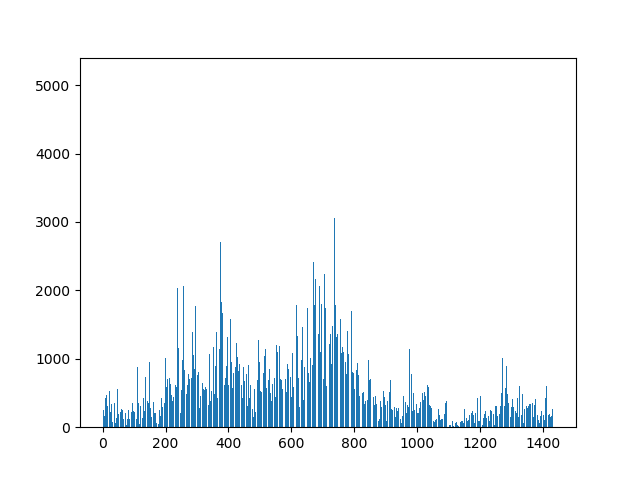

Wall time: 5.74 s


<BarContainer object of 1435 artists>

In [66]:
%%time

#Activity per minute?
activity = np.zeros(len(set(second_filter.astype('datetime64[m]'))))
index = 0
for i in set(second_filter.astype('datetime64[m]')):
    activity[index] = np.count_nonzero(rounded_timestamps==i)
    index += 1
    
plt.bar(range(0,len(set(second_filter.astype('datetime64[m]')))),tmp)

,bid,ask
date,,
2018-01-02 00:00:00.033000+00:00,1.20106,1.20110
2018-01-02 00:00:00.035000+00:00,1.20106,1.20109
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20109
...,...,...
2018-01-02 23:59:56.690000+00:00,1.20614,1.20618
2018-01-02 23:59:57.393000+00:00,1.20614,1.20618
2018-01-02 23:59:58.704000+00:00,1.20615,1.20618


In [ ]:
#we will now need activity per minute

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000


c:\users\karl\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Wall time: 1h 57min 18s


Text(0, 0.5, 'Price')

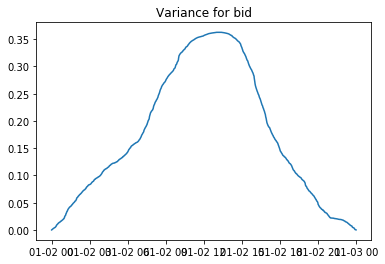

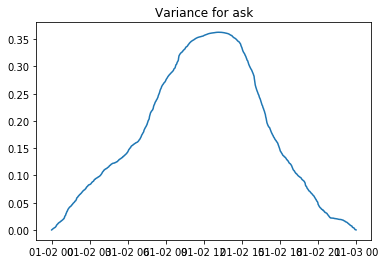

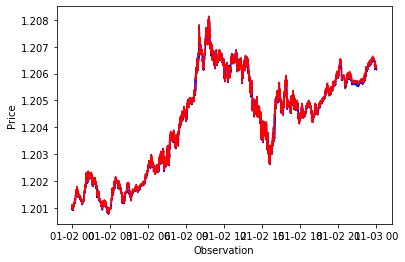

In [17]:
%%time

#this is a very costly script.. perhaps not the best..

variance_bid = np.zeros(len(bids)-1)
variance_ask = np.zeros(len(bids)-1)

bids_to_now = np.zeros(len(bids))
asks_to_now = np.zeros(len(bids))

bids_to_now[0] = bids[0]
asks_to_now[0] = asks[0]

timeaxle = ticks.index[1:len(ticks)]
timeaxle2 = ticks.index[0:len(ticks)]

for i in range(1,len(bids)-1):
    start = time.time()
    
    bids_to_now[i] = bids[i]
    asks_to_now[i] = asks[i]
    
    var1 = np.var(bids_to_now)
    var2 = np.var(asks_to_now)
    
    variance_bid[i] = var1
    variance_ask[i] = var2
    
    stop = time.time()
    if i % 10000 == 0:
        print(str(i) + ' / ' + str(len(bids)-1))
        print(stop-start)

plt.figure()
plt.plot(timeaxle,variance_bid)
plt.title('Variance for bid')

plt.figure()
plt.plot(timeaxle,variance_ask)
plt.title('Variance for ask')

plt.figure()
plt.plot(timeaxle2,bids,c='b')
plt.plot(timeaxle2,asks,c='r',ls='--')
plt.xlabel('Observation')
plt.ylabel('Price')

#plt.figure()
#plt.plot(range(0,l),bids,c='b')
#plt.plot(range(0,l),asks,c='r',ls='--')
#plt.xlabel('Observation')
#plt.ylabel('Price')

## Now we want to define high activity somehow and plot it with respect to time, so as a first test we chose to measure activity per second

In [54]:
%%time

second_filter = ticks.index[0:len(ticks)].values
test = second_filter.astype('datetime64[m]')

activity = np.zeros(len(set(test)))
timeaxle = [None]*len(set(test))
count = 0

for i in set(test):
    tmp = np.count_nonzero(test==i)
    activity[count] = tmp
    timeaxle[count] = i
    count += 1
    if count % 500 == 0:
        print(str(count) + ' / ' + str(len(set(test))))


500 / 1435
1000 / 1435
Wall time: 7.79 s


<IPython.core.display.Javascript object>


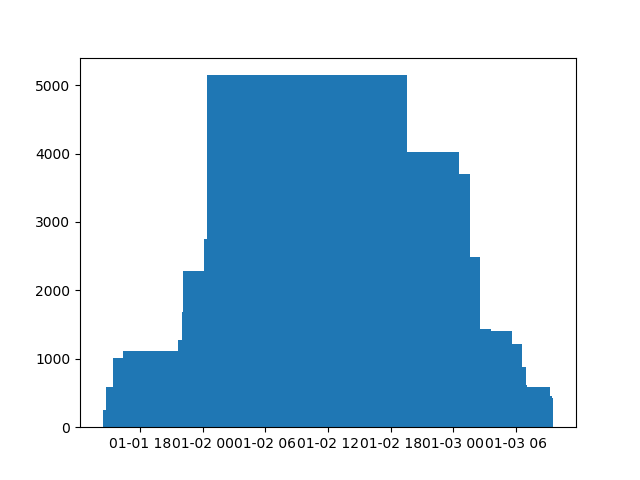

<BarContainer object of 1435 artists>

In [31]:
plt.figure()
plt.bar(timeaxle, activity)

In [59]:
np.count_nonzero(total_set[4]==3)

15447

In [ ]:
#plot for k-means clustering ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')

centers = Kmean.cluster_centers_
plt.scatter([centers[0][0], centers[1][0], centers[2][0]],[centers[0][1], centers[1][1], centers[2][1]], marker='+')

# plot for db_scan ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_DB[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_DB[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_DB[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_DB[i] == -1:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')
        
# plot for gmm ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_gmm[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_gmm[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_gmm[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_gmm[i] == 3:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')